# Racetrack Plot
Original source: http://stackoverflow.com/questions/15751442/making-a-circular-barplot-with-a-hollow-center-aka-race-track-plot

In [1]:
# load the ggplot2 library
library(ggplot2)

In [2]:
# create some simulated data
Category <- c("Electronics", "Appliances", "Books", "Music", "Clothing", 
              "Cars", "Food/Beverages", "Personal Hygiene", 
              "Personal Health/OTC", "Hair Care")
Percent <- c(81, 77, 70, 69, 69, 68, 62, 62, 61, 60)
internetImportance <- data.frame(Category,Percent)

## Create a dataframe that contains the legend information

In [3]:
# create a variable called len that equals 4
len <- 4

In [4]:
# create a data frame with three elements, Category, Percent, and Category2. this is all blank data so that the middle of the racetrack is blank
df2 <- data.frame(Category = letters[1:len], Percent = rep(0, len), 
                  Category2 = rep("", len))

In [5]:
# create a new Category2 variable in the internetImportance df that contains the category name, a dash, the importance percent, and a percent sign
internetImportance$Category2 <- 
  paste0(internetImportance$Category," - ",internetImportance$Percent,"%")

In [6]:
# append number to category name
internetImportance <- rbind(internetImportance, df2)

In [7]:
# set factor so it will plot in descending order 
internetImportance$Category <-
  factor(internetImportance$Category, 
         levels=rev(internetImportance$Category))

## Plot

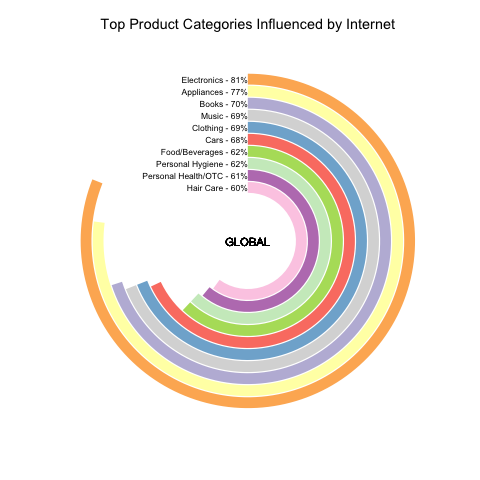

In [8]:
# great the ggplot data
ggplot(internetImportance, aes(x = Category, y = Percent,
                               fill = Category2)) + 
  # create a bar plot
  geom_bar(width = 0.9, stat="identity") + 
  scale_fill_brewer(palette="Set3") +
  # curve the bar chart 
  coord_polar(theta = "y") +
  # remove the x and y axis labels
  xlab("") + ylab("") +
  # let the "circumference" of the racetrack to 100
  ylim(c(0,100)) +
  # add a title at the top of the chart
  ggtitle("Top Product Categories Influenced by Internet") +
  # add the legend text
  geom_text(data = internetImportance, hjust = 1, size = 3,
            aes(x = Category, y = 0, label = Category2)) +
  # add the text in the middle of the racetrack
  geom_text(label="GLOBAL", x=.5, y=.5, size=4) +
  # use the minimal theme to make is pretty
  theme_minimal() +
  # remove the external legend, and remove all the extra elements
  theme(legend.position = "none",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_blank(),
        axis.text.y = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks = element_blank())